## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import ADASYN
from collections import Counter

In [ ]:
data_labeling = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bpom_skincare/data_labeling.csv')
data_labeling.head()

,full_text,case_folding,clean_review,normalization,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Video: BPOM Minta Masyarakat Aktif Awasi Pered...,video: bpom minta masyarakat aktif awasi pered...,video bpom minta masyarakat aktif awasi pereda...,video bpom meminta masyarakat aktif awasi pere...,"['video', 'bpom', 'meminta', 'masyarakat', 'ak...","['video', 'bpom', 'masyarakat', 'aktif', 'awas...",video bpom masyarakat aktif awas edar skincare...,"['video', 'bpom', 'masyarakat', 'aktif', 'awas...",2,1
1,@BPOM_RI Yeee masyarakat disuruh ningkatin kes...,@bpom_ri yeee masyarakat disuruh ningkatin kes...,yee masyarakat disuruh ningkatin kesadaran la...,ya masyarakat disuruh ningkatin kesadaran lah ...,"['ya', 'masyarakat', 'disuruh', 'ningkatin', '...","['masyarakat', 'disuruh', 'ningkatin', 'kesada...",masyarakat suruh ningkatin sadar kerja bpom sk...,"['masyarakat', 'suruh', 'ningkatin', 'sadar', ...",-19,-1
2,Untuk memaksimalkan pengawasan produk skincare...,untuk memaksimalkan pengawasan produk skincare...,untuk memaksimalkan pengawasan produk skincare...,untuk memaksimalkan pengawasan produk skincare...,"['untuk', 'memaksimalkan', 'pengawasan', 'prod...","['memaksimalkan', 'pengawasan', 'produk', 'ski...",maksimal awas produk skincare kashuri sila mas...,"['maksimal', 'awas', 'produk', 'skincare', 'ka...",10,1
3,Salah satu topik yang dibahas adalah upaya mew...,salah satu topik yang dibahas adalah upaya mew...,salah satu topik yang dibahas adalah upaya mew...,salah satu topik yang dibahas adalah upaya mew...,"['salah', 'satu', 'topik', 'yang', 'dibahas', ...","['salah', 'topik', 'dibahas', 'upaya', 'mewuju...",salah topik bahas upaya wujud kolaborasi linta...,"['salah', 'topik', 'bahas', 'upaya', 'wujud', ...",-4,-1
4,Haiii Dear 🥰\r\nBiasanya bumil gaberani pake s...,haiii dear 🥰\r\nbiasanya bumil gaberani pake s...,haii dear biasanya bumil gaberani pake skincar...,hai dear biasanya bumil gaberani pakai skincar...,"['hai', 'dear', 'biasanya', 'bumil', 'gaberani...","['hai', 'dear', 'bumil', 'gaberani', 'pakai', ...",hai dear bumil gaberani pakai skincare takut p...,"['hai', 'dear', 'bumil', 'gaberani', 'pakai', ...",7,1


In [ ]:
data_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   full_text       948 non-null    object
 1   case_folding    948 non-null    object
 2   clean_review    948 non-null    object
 3   normalization   948 non-null    object
 4   token           948 non-null    object
 5   stop_review     948 non-null    object
 6   stem_review     948 non-null    object
 7   prepos_text     948 non-null    object
 8   polarity_score  948 non-null    int64 
 9   polarity        948 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 74.2+ KB


## Splitting Data

In [ ]:
X = data_labeling['stem_review']
y = data_labeling['polarity']

In [ ]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [ ]:
print(f"Jumlah data latih (X_train): {X_train.shape[0]}")
print(f"Jumlah data uji (X_test): {X_test.shape[0]}")
print(f"Jumlah label latih (y_train): {len(y_train)}")
print(f"Jumlah label uji (y_test): {len(y_test)}")

Jumlah data latih (X_train): 758
Jumlah data uji (X_test): 190
Jumlah label latih (y_train): 758
Jumlah label uji (y_test): 190


## TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
tfidf_array = X_train_tfidf.toarray()
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

tfidf_sum = tfidf_df.sum(axis=0).reset_index()
tfidf_sum.columns = ['Kata', 'Skor TF-IDF']

tfidf_sum = tfidf_sum.sort_values(by='Skor TF-IDF', ascending=False)

tfidf_sum.head(10)

,Kata,Skor TF-IDF
1948,skincare,58.376816
292,bpom,51.129371
1646,produk,39.885931
165,bahaya,32.503492
1196,mafia,32.088726
1482,overclaim,29.405950
824,ilegal,22.653969
1171,lokal,21.333236
1073,kosmetik,21.298437
2227,usut,19.862195


## Optimasi PSO

In [ ]:
def fitness_function(params, X_train, y_train, X_test, y_test, kernel):
    # mengatur parameter berdasarkan kernel
    if kernel == 'linear':
        C = params[0]
        model = SVC(C=C, kernel=kernel, random_state=random_seed)

    elif kernel == 'rbf':
        C = params[0]
        gamma = params[1]
        model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=random_seed)

    elif kernel == 'sigmoid':
        C = params[0]
        gamma = params[1]
        coef0 = params[2]
        model = SVC(C=C, gamma=gamma, coef0=coef0, kernel=kernel, random_state=random_seed)

    elif kernel == 'poly':
        C = params[0]
        gamma = params[1]
        coef0 = params[2]
        degree = int(params[3])  # memastikan tipe integer
        model = SVC(C=C, gamma=gamma, coef0=coef0, degree=degree, kernel=kernel, random_state=random_seed)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# kelas partikel PSO
class Particle:
    def __init__(self, bounds):
        self.position = np.array([np.random.uniform(bound[0], bound[1]) for bound in bounds])
        self.velocity = np.random.uniform(-1, 1, len(bounds))
        self.best_position = self.position.copy()
        self.best_score = -1

# fungsi optimasi PSO dengan persamaan pembaruan kecepatan
def pso_optimize(fitness_function, bounds, num_particles, X_train, y_train, X_test, y_test, kernel, num_iterations=10):
    # parameter untuk pembaruan kecepatan
    w = 0.5  # berat inersia
    c1 = 2.0  # koefisien pembelajaran kognitif
    c2 = 2.0  # koefisien pembelajaran sosial

    particles = [Particle(bounds) for _ in range(num_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = -1

    print(f"--- Kernel {kernel.capitalize()} ---")

    for iteration in range(num_iterations):
        iteration_best_score = -1
        iteration_best_position = None

        for particle in particles:
            # evaluasi fitness dari posisi partikel
            fitness = fitness_function(particle.position, X_train, y_train, X_test, y_test, kernel)

            # perbarui personal best jika diperlukan
            if fitness > particle.best_score:
                particle.best_score = fitness
                particle.best_position = particle.position.copy()

            # perbarui global best jika diperlukan
            if fitness > global_best_score:
                global_best_score = fitness
                global_best_position = particle.position.copy()

            # lacak fitness terbaik dalam iterasi ini
            if fitness > iteration_best_score:
                iteration_best_score = fitness
                iteration_best_position = particle.position.copy()

            # bilangan acak r1 dan r2
            r1 = np.random.uniform(0, 1, len(bounds))
            r2 = np.random.uniform(0, 1, len(bounds))

            # perbarui kecepatan menggunakan persamaan PSO
            particle.velocity = (
                w * particle.velocity
                + c1 * r1 * (particle.best_position - particle.position)
                + c2 * r2 * (global_best_position - particle.position)
            )

            # perbarui posisi partikel dengan menambahkan kecepatan
            particle.position += particle.velocity

            # pastikan posisi tetap berada dalam batas
            for i in range(len(bounds)):
                if particle.position[i] < bounds[i][0]:
                    particle.position[i] = bounds[i][0]
                if particle.position[i] > bounds[i][1]:
                    particle.position[i] = bounds[i][1]

        # cetak fitness terbaik dan parameter dari iterasi ini
        params_str = ', '.join([f"{param:.6f}" for param in iteration_best_position])
        print(f"Iteration {iteration + 1} (params: {params_str}) - Accuracy: {iteration_best_score:.6f}")

    return global_best_position, global_best_score


# kernel dan batas parameter
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
bounds = {
    'linear': [(0.1, 100)],
    'rbf': [(0.1, 100), (0.000001, 1)],
    'sigmoid': [(0.1, 100), (0.000001, 1), (-1,1)],
    'poly': [(0.1, 100), (0.000001, 1), (-1,1), (2, 5)]
}

# lakukan iterasi melalui setiap kernel
for kernel in kernels:
    bounds_for_kernel = bounds[kernel]

    # optimasi PSO tanpa iterasi, hanya satu evaluasi untuk 10 partikel
    best_params, best_score = pso_optimize(fitness_function, bounds_for_kernel, num_particles=10,
                                           X_train=X_train_tfidf, y_train=y_train,
                                           X_test=X_test_tfidf, y_test=y_test,
                                           kernel=kernel)

    print(f"\nOptimal parameters for {kernel} kernel: {best_params}")

    # latih SVM dengan parameter optimal
    if kernel == 'poly':
        optimal_svm_clf = SVC(C=best_params[0], gamma=best_params[1], coef0=best_params[2],
                            degree=int(best_params[3]), kernel=kernel, random_state=random_seed)
    elif kernel == 'sigmoid':
        optimal_svm_clf = SVC(C=best_params[0], gamma=best_params[1], coef0=best_params[2],
                            kernel=kernel, random_state=random_seed)
    elif kernel == 'rbf':
        optimal_svm_clf = SVC(C=best_params[0], gamma=best_params[1],
                            kernel=kernel, random_state=random_seed)
    elif kernel == 'linear':
        optimal_svm_clf = SVC(C=best_params[0], kernel=kernel, random_state=random_seed)

    # fit model dan lakukan prediksi
    optimal_svm_clf.fit(X_train_tfidf, y_train)
    optimal_y_pred = optimal_svm_clf.predict(X_test_tfidf)

    # menghitung akurasi
    accuracy_pso = accuracy_score(y_test, optimal_y_pred)
    print(f"SVM PSO Final Accuracy for {kernel} kernel: {accuracy_pso}")

    print("\n" + "="*60 + "\n")

--- Kernel Linear ---
Iteration 1 (params: 37.516558) - Accuracy: 0.847368
Iteration 2 (params: 37.967272) - Accuracy: 0.847368
Iteration 3 (params: 37.636254) - Accuracy: 0.847368
Iteration 4 (params: 37.312740) - Accuracy: 0.847368
Iteration 5 (params: 37.756894) - Accuracy: 0.847368
Iteration 6 (params: 37.657959) - Accuracy: 0.847368
Iteration 7 (params: 37.126729) - Accuracy: 0.847368
Iteration 8 (params: 37.807798) - Accuracy: 0.847368
Iteration 9 (params: 37.565801) - Accuracy: 0.847368
Iteration 10 (params: 37.400037) - Accuracy: 0.847368

Optimal parameters for linear kernel: [37.51655787]
SVM PSO Final Accuracy for linear kernel: 0.8473684210526315


--- Kernel Rbf ---
Iteration 1 (params: 57.732698, 0.492518) - Accuracy: 0.852632
Iteration 2 (params: 65.389203, 0.436025) - Accuracy: 0.857895
Iteration 3 (params: 80.892375, 0.769887) - Accuracy: 0.857895
Iteration 4 (params: 73.537317, 0.421829) - Accuracy: 0.857895
Iteration 5 (params: 65.490584, 0.434790) - Accuracy: 0.8578

## ADASYN Oversampling

In [ ]:
adasyn = ADASYN(random_state=random_seed)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_tfidf, y_train)

In [ ]:
print("Sebelum ADASYN:", Counter(y_train))
print("Setelah ADASYN:", Counter(y_train_adasyn))

Sebelum ADASYN: Counter({-1: 527, 1: 231})
Setelah ADASYN: Counter({-1: 527, 1: 468})


/tmp/ipython-input-13-1065474160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.countplot(x=y_train, ax=axs[0], palette=palette)
/tmp/ipython-input-13-1065474160.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot1 = sns.countplot(x=y_train, ax=axs[0], palette=palette)
/tmp/ipython-input-13-1065474160.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(["Negatif", "Positif"], fontsize=12)
/tmp/ipython-input-13-1065474160.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot2 = sns.countplot(x=y_train_adasyn, ax=axs[1], palette=palett

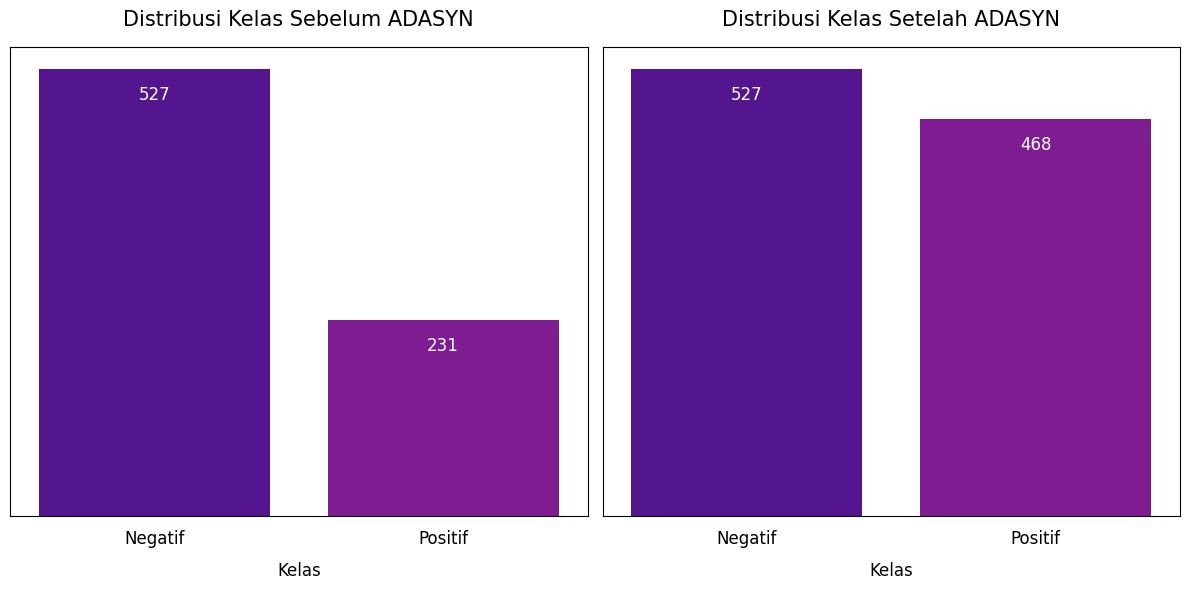

In [ ]:
palette = sns.color_palette("plasma")
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# sebelum ADASYN
plot1 = sns.countplot(x=y_train, ax=axs[0], palette=palette)
axs[0].set_title("Distribusi Kelas Sebelum ADASYN", pad=15, fontsize=15)
axs[0].set_xlabel("Kelas", labelpad=10, fontsize=12)
axs[0].set_ylabel("")
axs[0].set_xticklabels(["Negatif", "Positif"], fontsize=12)
axs[0].set_yticks([])
axs[0].tick_params(axis='both', length=0, pad=10)

for container in plot1.containers:
    axs[0].bar_label(container, label_type='edge', padding=-25, color="white", fontsize=12)

# setelah ADASYN
plot2 = sns.countplot(x=y_train_adasyn, ax=axs[1], palette=palette)
axs[1].set_title("Distribusi Kelas Setelah ADASYN", pad=15, fontsize=15)
axs[1].set_xlabel("Kelas", labelpad=10, fontsize=12)
axs[1].set_ylabel("")
axs[1].set_xticklabels(["Negatif", "Positif"], fontsize=12)
axs[1].set_yticks([])
axs[1].tick_params(axis='both', length=0, pad=10)

for container in plot2.containers:
    axs[1].bar_label(container, label_type='edge', padding=-25, color="white", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# optimasi PSO setelah ADASYN

def fitness_function(params, X_train, y_train, X_test, y_test, kernel):
    # mengatur parameter berdasarkan kernel
    if kernel == 'linear':
        C = params[0]
        model = SVC(C=C, kernel=kernel, random_state=random_seed)

    elif kernel == 'rbf':
        C = params[0]
        gamma = params[1]
        model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=random_seed)

    elif kernel == 'sigmoid':
        C = params[0]
        gamma = params[1]
        coef0 = params[2]
        model = SVC(C=C, gamma=gamma, coef0=coef0, kernel=kernel, random_state=random_seed)

    elif kernel == 'poly':
        C = params[0]
        gamma = params[1]
        coef0 = params[2]
        degree = int(params[3])  # memastikan tipe integer
        model = SVC(C=C, gamma=gamma, coef0=coef0, degree=degree, kernel=kernel, random_state=random_seed)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# kelas partikel PSO
class Particle:
    def __init__(self, bounds):
        self.position = np.array([np.random.uniform(bound[0], bound[1]) for bound in bounds])
        self.velocity = np.random.uniform(-1, 1, len(bounds))
        self.best_position = self.position.copy()
        self.best_score = -1

# fungsi optimasi PSO dengan persamaan pembaruan kecepatan
def pso_optimize(fitness_function, bounds, num_particles, X_train, y_train, X_test, y_test, kernel, num_iterations=10):
    # parameter untuk pembaruan kecepatan
    w = 0.5  # berat inersia
    c1 = 2.0  # koefisien pembelajaran kognitif
    c2 = 2.0  # koefisien pembelajaran sosial

    particles = [Particle(bounds) for _ in range(num_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = -1

    print(f"--- Kernel {kernel.capitalize()} ---")

    for iteration in range(num_iterations):
        iteration_best_score = -1
        iteration_best_position = None

        for particle in particles:
            # evaluasi fitness dari posisi partikel
            fitness = fitness_function(particle.position, X_train, y_train, X_test, y_test, kernel)

            # perbarui personal best jika diperlukan
            if fitness > particle.best_score:
                particle.best_score = fitness
                particle.best_position = particle.position.copy()

            # perbarui global best jika diperlukan
            if fitness > global_best_score:
                global_best_score = fitness
                global_best_position = particle.position.copy()

            # lacak fitness terbaik dalam iterasi ini
            if fitness > iteration_best_score:
                iteration_best_score = fitness
                iteration_best_position = particle.position.copy()

            # bilangan acak r1 dan r2
            r1 = np.random.uniform(0, 1, len(bounds))
            r2 = np.random.uniform(0, 1, len(bounds))

            # perbarui kecepatan menggunakan persamaan PSO
            particle.velocity = (
                w * particle.velocity
                + c1 * r1 * (particle.best_position - particle.position)
                + c2 * r2 * (global_best_position - particle.position)
            )

            # perbarui posisi partikel dengan menambahkan kecepatan
            particle.position += particle.velocity

            # pastikan posisi tetap berada dalam batas
            for i in range(len(bounds)):
                if particle.position[i] < bounds[i][0]:
                    particle.position[i] = bounds[i][0]
                if particle.position[i] > bounds[i][1]:
                    particle.position[i] = bounds[i][1]

        # cetak fitness terbaik dan parameter dari iterasi ini
        params_str = ', '.join([f"{param:.6f}" for param in iteration_best_position])
        print(f"Iteration {iteration + 1} (params: {params_str}) - Accuracy: {iteration_best_score:.6f}")

    return global_best_position, global_best_score


# kernel dan batas parameter
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
bounds = {
    'linear': [(0.1, 100)],
    'rbf': [(0.1, 100), (0.000001, 1)],
    'sigmoid': [(0.1, 100), (0.000001, 1), (-1,1)],
    'poly': [(0.1, 100), (0.000001, 1), (-1,1), (2, 5)]
}

# lakukan iterasi melalui setiap kernel
for kernel in kernels:
    bounds_for_kernel = bounds[kernel]

    # optimasi PSO tanpa iterasi, hanya satu evaluasi untuk 10 partikel
    best_params, best_score = pso_optimize(fitness_function, bounds_for_kernel, num_particles=10,
                                           X_train=X_train_adasyn, y_train=y_train_adasyn,
                                           X_test=X_test_tfidf, y_test=y_test,
                                           kernel=kernel)

    print(f"\nOptimal parameters for {kernel} kernel: {best_params}")

    # latih SVM dengan parameter optimal
    if kernel == 'poly':
        optimal_svm_clf = SVC(C=best_params[0], gamma=best_params[1], coef0=best_params[2],
                            degree=int(best_params[3]), kernel=kernel, random_state=random_seed)
    elif kernel == 'sigmoid':
        optimal_svm_clf = SVC(C=best_params[0], gamma=best_params[1], coef0=best_params[2],
                            kernel=kernel, random_state=random_seed)
    elif kernel == 'rbf':
        optimal_svm_clf = SVC(C=best_params[0], gamma=best_params[1],
                            kernel=kernel, random_state=random_seed)
    elif kernel == 'linear':
        optimal_svm_clf = SVC(C=best_params[0], kernel=kernel, random_state=random_seed)

    # fit model dan lakukan prediksi
    optimal_svm_clf.fit(X_train_adasyn, y_train_adasyn)
    optimal_y_pred = optimal_svm_clf.predict(X_test_tfidf)

    # menghitung akurasi
    accuracy_pso = accuracy_score(y_test, optimal_y_pred)
    print(f"SVM PSO Final Accuracy for {kernel} kernel: {accuracy_pso}")

    print("\n" + "="*60 + "\n")

--- Kernel Linear ---
Iteration 1 (params: 97.682353) - Accuracy: 0.847368
Iteration 2 (params: 97.293073) - Accuracy: 0.847368
Iteration 3 (params: 97.744052) - Accuracy: 0.847368
Iteration 4 (params: 97.799769) - Accuracy: 0.847368
Iteration 5 (params: 97.682913) - Accuracy: 0.847368
Iteration 6 (params: 97.622945) - Accuracy: 0.847368
Iteration 7 (params: 97.785638) - Accuracy: 0.847368
Iteration 8 (params: 97.697145) - Accuracy: 0.847368
Iteration 9 (params: 97.640067) - Accuracy: 0.847368
Iteration 10 (params: 97.753607) - Accuracy: 0.847368

Optimal parameters for linear kernel: [97.68235282]
SVM PSO Final Accuracy for linear kernel: 0.8473684210526315


--- Kernel Rbf ---
Iteration 1 (params: 16.086491, 0.023353) - Accuracy: 0.873684
Iteration 2 (params: 18.409977, 1.000000) - Accuracy: 0.852632
Iteration 3 (params: 31.744981, 0.957530) - Accuracy: 0.857895
Iteration 4 (params: 80.283509, 0.393209) - Accuracy: 0.857895
Iteration 5 (params: 16.346368, 0.027358) - Accuracy: 0.8631

## Klasifikasi SVM

In [ ]:
# model SVM
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
results = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=random_seed)
    svm_model.fit(X_train_tfidf, y_train)
    y_pred = svm_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    results.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

result_svm = pd.DataFrame(results)
print(result_svm)

    Kernel  Accuracy  Precision    Recall  F1-Score
0   linear  0.831579   0.808295  0.735929  0.759532
1      rbf  0.805263   0.865302  0.643462  0.664775
2  sigmoid  0.826316   0.808347  0.719918  0.745649
3     poly  0.784211   0.886111  0.598039  0.599671


In [ ]:
# model SVM kernel RBF
svm = SVC(kernel='rbf', random_state=random_seed)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred_svm, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_svm, average='macro', zero_division=0)

print("Hasil Evaluasi SVM (Kernel RBF):")
print(f"Akurasi  : {acc:.6f}")
print(f"Presisi  : {prec:.6f}")
print(f"Recall   : {rec:.6f}")
print(f"F1-Score : {f1:.6f}")

Hasil Evaluasi SVM (Kernel RBF):
Akurasi  : 0.805263
Presisi  : 0.865302
Recall   : 0.643462
F1-Score : 0.664775


In [ ]:
# model SVM-PSO
svm_pso = SVC(kernel='rbf', C=65.38920271, gamma=0.43602484, random_state=random_seed)
svm_pso.fit(X_train_tfidf, y_train)
y_pred_pso = svm_pso.predict(X_test_tfidf)

acc_pso = accuracy_score(y_test, y_pred_pso)
prec_pso = precision_score(y_test, y_pred_pso, average='macro', zero_division=0)
rec_pso = recall_score(y_test, y_pred_pso, average='macro', zero_division=0)
f1_pso = f1_score(y_test, y_pred_pso, average='macro', zero_division=0)

print("Hasil Evaluasi SVM-PSO (Kernel RBF):")
print(f"Akurasi  : {acc_pso:.6f}")
print(f"Presisi  : {prec_pso:.6f}")
print(f"Recall   : {rec_pso:.6f}")
print(f"F1-Score : {f1_pso:.6f}")

Hasil Evaluasi SVM-PSO (Kernel RBF):
Akurasi  : 0.857895
Presisi  : 0.832046
Recall   : 0.791155
F1-Score : 0.807800


In [ ]:
# model SVM-ADASYN
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
results_adasyn = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=random_seed)
    svm_model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = svm_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    results_adasyn.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

result_svm_adasyn = pd.DataFrame(results_adasyn)
print(result_svm_adasyn)

    Kernel  Accuracy  Precision    Recall  F1-Score
0   linear  0.868421   0.831522  0.835590  0.833514
1      rbf  0.821053   0.857706  0.679080  0.708694
2  sigmoid  0.852632   0.814155  0.806179  0.810000
3     poly  0.805263   0.810877  0.662082  0.686315


In [ ]:
# model SVM-ADASYN kernel RBF
svm_adasyn = SVC(kernel='rbf', random_state=random_seed)
svm_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = svm_adasyn.predict(X_test_tfidf)

acc_adasyn = accuracy_score(y_test, y_pred_adasyn)
prec_adasyn = precision_score(y_test, y_pred_adasyn, average='macro', zero_division=0)
rec_adasyn = recall_score(y_test, y_pred_adasyn, average='macro', zero_division=0)
f1_adasyn = f1_score(y_test, y_pred_adasyn, average='macro', zero_division=0)

print("Hasil Evaluasi SVM-ADASYN (Kernel RBF):")
print(f"Akurasi  : {acc_adasyn:.6f}")
print(f"Presisi  : {prec_adasyn:.6f}")
print(f"Recall   : {rec_adasyn:.6f}")
print(f"F1-Score : {f1_adasyn:.6f}")

Hasil Evaluasi SVM-ADASYN (Kernel RBF):
Akurasi  : 0.821053
Presisi  : 0.857706
Recall   : 0.679080
F1-Score : 0.708694


In [ ]:
# model SVM-PSO-ADASYN
svm_pso_adasyn = SVC(kernel='rbf', C=16.08649115, gamma=0.02335307, random_state=random_seed)
svm_pso_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_pso_adasyn = svm_pso_adasyn.predict(X_test_tfidf)

acc_pso_adasyn = accuracy_score(y_test, y_pred_pso_adasyn)
prec_pso_adasyn = precision_score(y_test, y_pred_pso_adasyn, average='macro', zero_division=0)
rec_pso_adasyn = recall_score(y_test, y_pred_pso_adasyn, average='macro', zero_division=0)
f1_pso_adasyn = f1_score(y_test, y_pred_pso_adasyn, average='macro', zero_division=0)

print("Hasil Evaluasi SVM-PSO_ADASYN (Kernel RBF):")
print(f"Akurasi  : {acc_pso_adasyn:.6f}")
print(f"Presisi  : {prec_pso_adasyn:.6f}")
print(f"Recall   : {rec_pso_adasyn:.6f}")
print(f"F1-Score : {f1_pso_adasyn:.6f}")

Hasil Evaluasi SVM-PSO_ADASYN (Kernel RBF):
Akurasi  : 0.873684
Presisi  : 0.837213
Recall   : 0.845394
F1-Score : 0.841137


In [ ]:
model_names = ['SVM', 'SVM-PSO', 'SVM-ADASYN', 'SVM-ADASYN-PSO']
predictions = [y_pred_svm, y_pred_pso, y_pred_adasyn, y_pred_pso_adasyn]

results = []

for name, y_pred in zip(model_names, predictions):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'Akurasi': round(acc, 4),
        'Presisi': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4)
    })

df_hasil_klasifikasi = pd.DataFrame(results)
print(df_hasil_klasifikasi)

            Model  Akurasi  Presisi  Recall  F1-Score
0             SVM   0.8053   0.9375  0.2941    0.4478
1         SVM-PSO   0.8579   0.7857  0.6471    0.7097
2      SVM-ADASYN   0.8211   0.9048  0.3725    0.5278
3  SVM-ADASYN-PSO   0.8737   0.7547  0.7843    0.7692


## Evaluasi Model

### Perbandingan Hasil Evaluasi Model SVM dan SVM-ADASYN

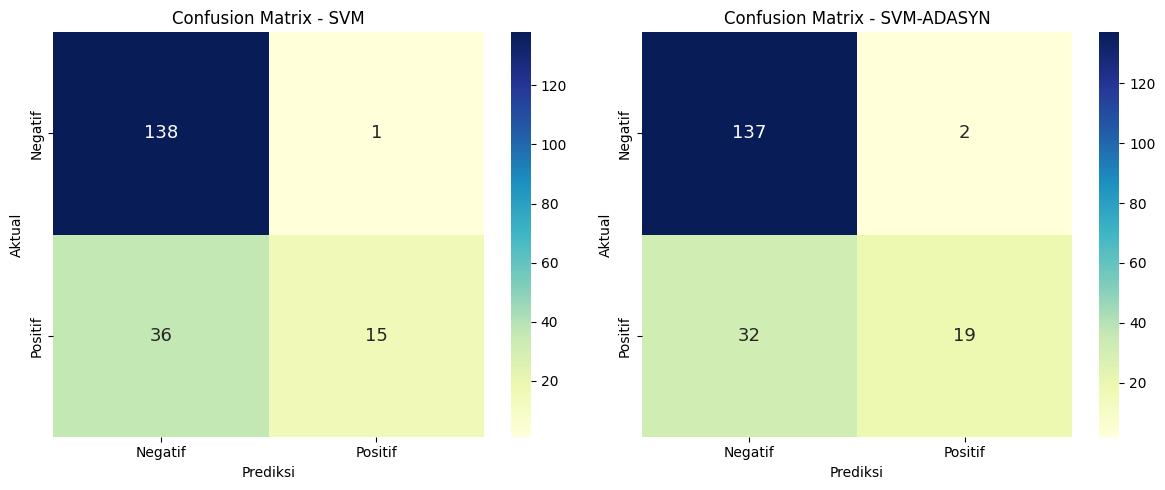

In [ ]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
matrix_adasyn = confusion_matrix(y_test, y_pred_adasyn)

labels = ['Negatif', 'Positif']
df_cm_svm = pd.DataFrame(matrix_svm, index=labels, columns=labels)
df_cm_adasyn = pd.DataFrame(matrix_adasyn, index=labels, columns=labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(df_cm_svm, annot=True, cmap="YlGnBu", fmt='g', ax=axes[0], annot_kws={"fontsize":13})
axes[0].set_title("Confusion Matrix 'SVM'")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Aktual")

sns.heatmap(df_cm_adasyn, annot=True, cmap="YlGnBu", fmt='g', ax=axes[1], annot_kws={"fontsize":13})
axes[1].set_title("Confusion Matrix 'SVM-ADASYN'")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("Aktual")

plt.tight_layout()
plt.show()

### Perbandingan Hasil Evaluasi Model SVM-PSO dan SVM-PSO-ADASYN

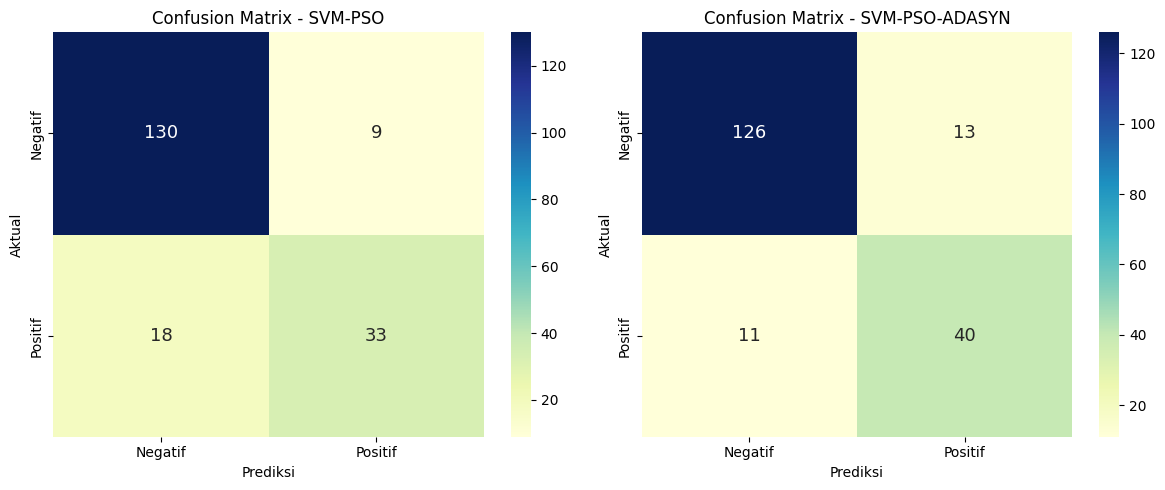

In [ ]:
matrix_pso = confusion_matrix(y_test, y_pred_pso)
matrix_pso_adasyn = confusion_matrix(y_test, y_pred_pso_adasyn)

labels = ['Negatif', 'Positif']
df_cm_pso = pd.DataFrame(matrix_pso, index=labels, columns=labels)
df_cm_pso_adasyn = pd.DataFrame(matrix_pso_adasyn, index=labels, columns=labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(df_cm_pso, annot=True, cmap="YlGnBu", fmt='g', ax=axes[0], annot_kws={"fontsize":13})
axes[0].set_title("Confusion Matrix 'SVM-PSO'")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Aktual")

sns.heatmap(df_cm_pso_adasyn, annot=True, cmap="YlGnBu", fmt='g', ax=axes[1], annot_kws={"fontsize":13})
axes[1].set_title("Confusion Matrix 'SVM-PSO-ADASYN'")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("Aktual")

plt.tight_layout()
plt.show()

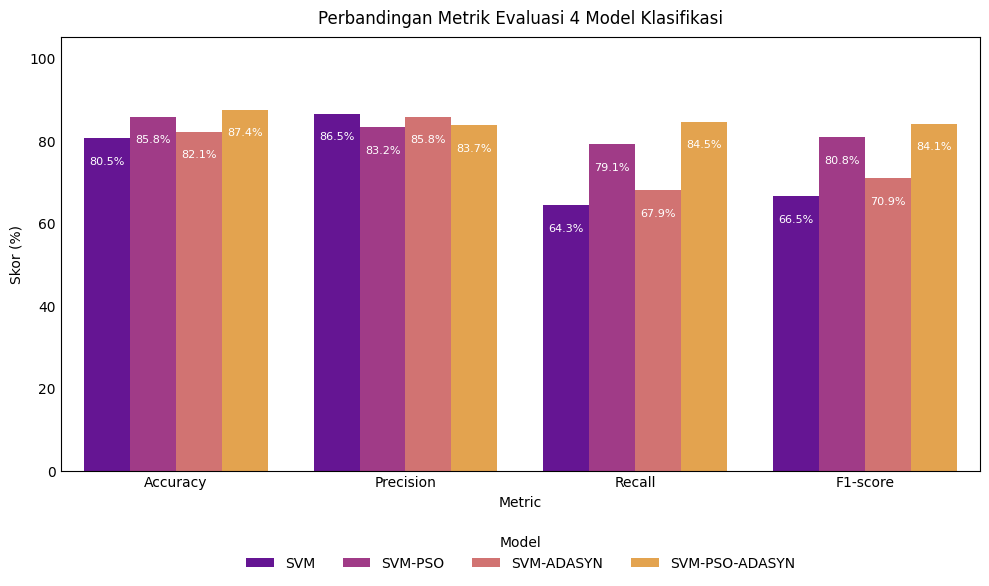

In [ ]:
def evaluate_model(y_true, y_pred, label):
    return {
        'Model': label,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1-score': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }

# Hasil evaluasi dari keempat model
result_model = []
result_model.append(evaluate_model(y_test, y_pred_svm, "SVM"))
result_model.append(evaluate_model(y_test, y_pred_pso, "SVM-PSO"))
result_model.append(evaluate_model(y_test, y_pred_adasyn, "SVM-ADASYN"))
result_model.append(evaluate_model(y_test, y_pred_pso_adasyn, "SVM-PSO-ADASYN"))

# Buat DataFrame dan ubah ke format melt
df_compare = pd.DataFrame(result_model)
df_melt = df_compare.melt(id_vars='Model', var_name='Metric', value_name='Score')
df_melt['Score'] = df_melt['Score'] * 100  # Ubah ke persen

# Buat plot: sumbu X adalah METRIC, bukan model
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melt, x='Metric', y='Score', hue='Model', palette='plasma')
ax.tick_params(axis='both', length=0)

# Tambahkan label persen
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', color='white', fontsize=8, padding=-20)

# Atur tampilan
plt.title('Perbandingan Metrik Evaluasi 4 Model Klasifikasi', pad=10)
plt.ylabel('Skor (%)')
plt.ylim(0, 105)
plt.legend(title='Model', loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)
plt.tight_layout()
plt.show()